In [1]:
import geopandas as gpd
import sys
import copy
import numpy as np
import pandas as pd
import datetime
import time
from datetime import timedelta, date
from numpy import array
import os
import errno
from numpy import hstack
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib.pyplot import figure

ModuleNotFoundError: No module named 'geopandas'

In [1]:
    url = "https://raw.githubusercontent.com/rohitash-chandra/CMTL_dynamictimeseries/master/SouthPacificOcean/updated_rawdata/jtwc_besttrack_southpacificocean.csv"
    df = pd.read_csv(url, sep=',',header = None,error_bad_lines=False)
    df.columns = ['ID','Date','Longitude','Latitude','Speed']
    df['Category'] = df['Speed'].apply(lambda x: 1 if x<=27 else 2  if x<=33 and x> 27 else 3 if x<=47 and x> 33 else 4 if x<=63 and x> 47 else 5 if x<=89 and x> 63 else 6 if x<=119 and x>89 else 7 )
    df.to_csv('adjusted.csv')
    df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')
    for i in range(1,len(df)):
        if df['Speed'][i]<0:
            df['Speed'][i]=df['Speed'][i-1]

NameError: name 'pd' is not defined

In [1]:
i=1
while(i<50):
    max_cat=0
    for j in range(len(df['ID'])):
        if (df['ID'][j]==i):
            if (df['Category'][j]>max_cat):
                max_cat=df['Category'][j]
                
    for j in range(len(df['ID'])):
        if(df['ID'][j]==i):
            df['Category'][j]=max_cat
    
    i=i+1
        


NameError: name 'df' is not defined

In [7]:
plot_long=np.zeros(len(df['ID']))
plot_lat=np.zeros(len(df['ID']))
plot_cat=np.zeros(len(df['ID']))

plot_long[0]=df['Longitude'][0]
plot_lat[0]=df['Latitude'][0]
plot_cat[0]=df['Category'][0]

for i in range(1,len(df['ID'])):
    if df['ID'][i]!=df['ID'][i-1]:
        plot_long[i]=df['Longitude'][i]
        plot_lat[i]=df['Latitude'][i]
        plot_cat[i]=df['Category'][i]


In [8]:
plot_long=plot_long[plot_long!=0]
plot_lat=plot_lat[plot_lat!=0]
plot_cat=plot_cat[plot_cat!=0]

In [65]:
dataset = pd.DataFrame({'Longitude': plot_long, 'Latitude': plot_lat, 'Category':plot_cat})[0:20]

In [66]:
df_geo=gpd.GeoDataFrame(dataset,geometry= gpd.points_from_xy(dataset.Longitude,dataset.Latitude))

In [68]:
world_data=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [71]:

plt.rcParams["figure.figsize"] = (20,20)


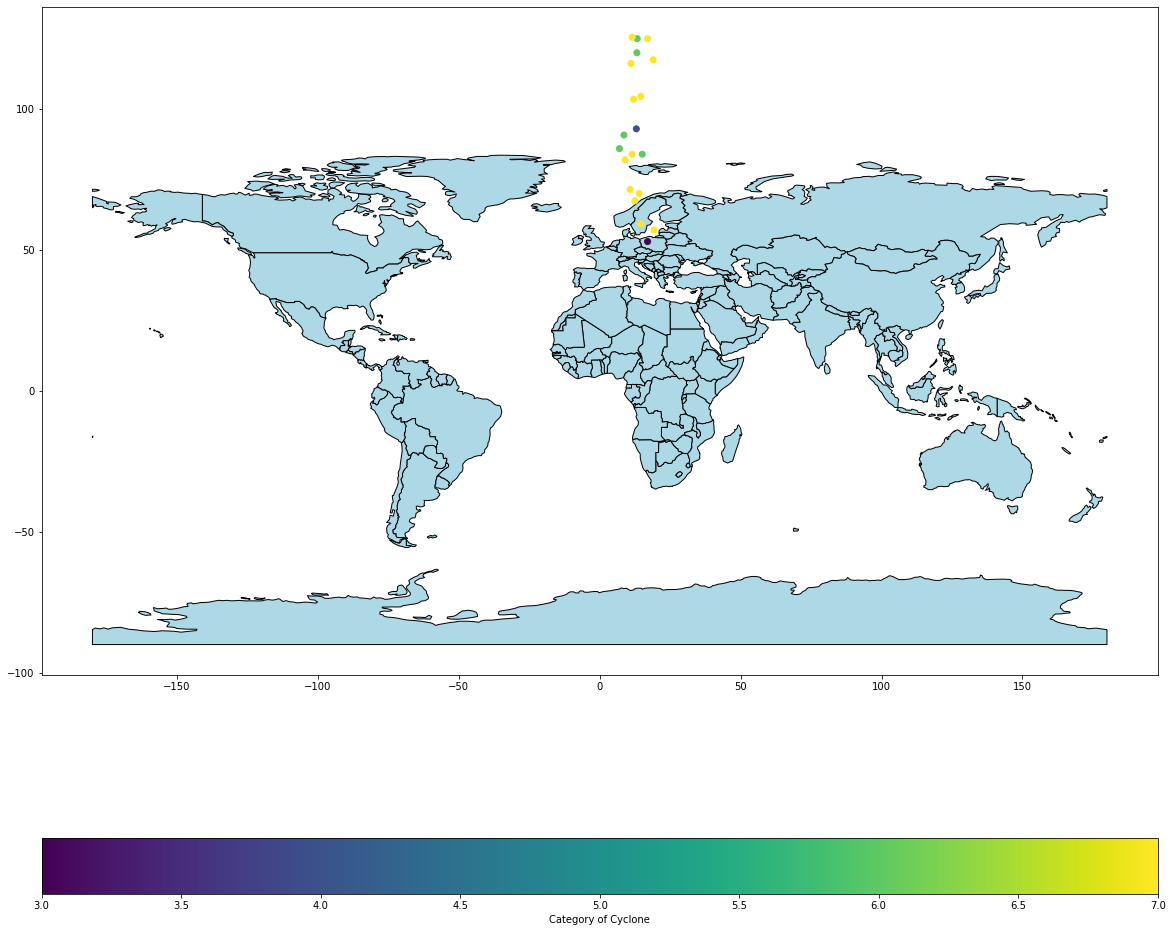

In [72]:
ax = world_data.plot(
    color='lightblue', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
df_geo.plot(column='Category',ax=ax, legend=True, legend_kwds={'label': "Category of Cyclone",
                'orientation': "horizontal"})

plt.show()